In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import streamlit as st

In [2]:
df=pd.read_csv("supply_chain_data.csv")

In [4]:
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [15]:
df.tail(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
90,skincare,SKU90,13.881914,56,320,9592.633570,Non-binary,66,18,96,...,Bangalore,8,585,8,85.675963,Pass,1.219382,Rail,Route B,990.078473
91,cosmetics,SKU91,62.111965,90,916,1935.206794,Male,98,22,85,...,Delhi,5,207,28,39.772883,Pending,0.626002,Rail,Route B,996.778315
92,cosmetics,SKU92,47.714233,44,276,2100.129755,Male,90,25,10,...,Mumbai,4,671,29,62.612690,Pass,0.333432,Rail,Route B,230.092783
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,Chennai,21,824,20,35.633652,Fail,4.165782,Air,Route A,823.523846
94,cosmetics,SKU94,3.037689,97,987,7888.356547,Unknown,77,26,72,...,Delhi,12,908,14,60.387379,Pass,1.463607,Rail,Route B,846.665257
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [16]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [17]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

# DATA CLEANING

In [19]:
df=df.dropna()

In [20]:
checking_duplicates=df.duplicated()

In [21]:
print(checking_duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


In [22]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [3]:
df['Order quantities'].sum()

np.int64(4922)

In [16]:
df['Location'].count()

np.int64(100)

# EXPLORATORY DATA ANALYSIS

**Top Performing Product Types**

Which product types bring in the highest revenue or sales?”

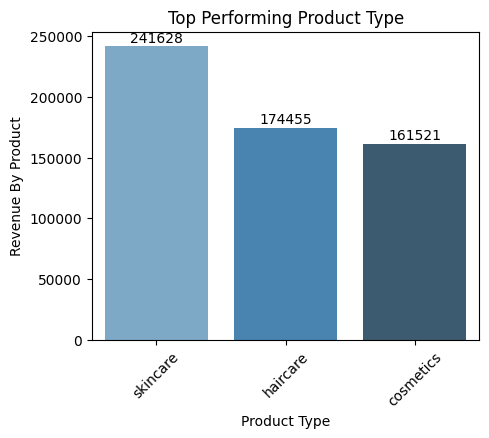

In [21]:
revenue_by_product=df.groupby('Product type')['Revenue generated'].sum().sort_values(ascending =False).reset_index()
plt.figure(figsize=(5,4))

ax=sns.barplot(data=revenue_by_product,x='Product type',y='Revenue generated',palette='Blues_d')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.xticks(rotation=45)
   
plt.xlabel('Product Type')
plt.ylabel('Revenue By Product')
plt.title('Top Performing Product Type')
plt.show()

**Shipping Carrier Performance**

Identify the most cost-effective shipping carrier while considering delivery time efficiency across different carriers."

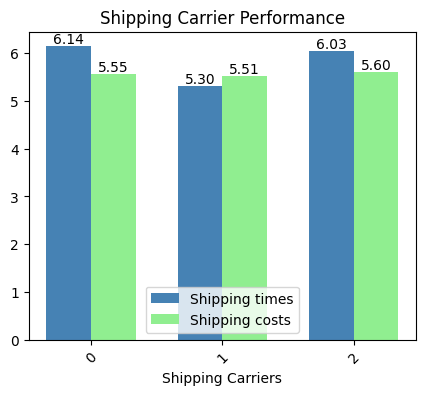

In [22]:
carrier_statistics=df.groupby('Shipping carriers')[['Shipping times','Shipping costs']].mean().reset_index()
plt.figure(figsize=(5,4))
bar_width=0.34
index=np.arange(len(carrier_statistics['Shipping carriers']))
bars1=plt.bar(index,carrier_statistics['Shipping times'],bar_width,label='Shipping times',color='steelblue')
bars2=plt.bar(index+bar_width,carrier_statistics['Shipping costs'],bar_width,label='Shipping costs',color='lightgreen')
plt.xticks(index+bar_width/2,carrier_statistics.index,rotation=45)
plt.bar_label(bars1,fmt='%.2f')
plt.bar_label(bars2,fmt='%.2f')
plt.xlabel('Shipping Carriers')
plt.title('Shipping Carrier Performance')
plt.legend()
plt.show()

**Relationship Between Defect Rates and Manufacturing Costs by Supplier**

Analyzing the relationship between manufacturing costs and defect rates across suppliers to identify cost-effective and quality-focused partnerships

In [3]:
supplier_statistics=df.groupby('Supplier name')[['Manufacturing costs','Defect rates']].sum().reset_index()

In [4]:
print(supplier_statistics)

  Supplier name  Manufacturing costs  Defect rates
0    Supplier 1          1221.858734     48.698002
1    Supplier 2           915.695312     51.980503
2    Supplier 3           654.511820     36.986790
3    Supplier 4          1128.775084     42.073153
4    Supplier 5           805.828374     47.977350


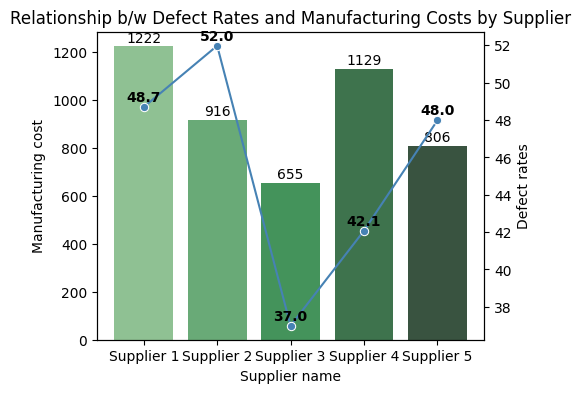

In [7]:
fig,ax1=plt.subplots(figsize=(5,4))
ax1=sns.barplot(data=supplier_statistics,x='Supplier name',y='Manufacturing costs',label='Manufacturing costs',ax=ax1,palette='Greens_d')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=1)
ax2=ax1.twinx()

sns.lineplot(data=supplier_statistics, x='Supplier name', y='Defect rates', ax=ax2, marker='o', color='steelblue')

for i , value in enumerate(supplier_statistics['Defect rates']):
    ax2.text(supplier_statistics['Supplier name'][i],value+0.3,f'{value:.1f}',ha='center',color='black',weight='bold')

ax1.set_xlabel('Supplier name')
ax1.set_ylabel('Manufacturing cost')
ax2.set_ylabel('Defect rates')
plt.title('Relationship b/w Defect Rates and Manufacturing Costs by Supplier')
plt.show()

**Impact of Stock Levels on Product** 

 Which product types have the highest stock levels

In [67]:
product_statistics= df.groupby('Product type')['Stock levels'].mean().reset_index()
product_statistics

,Product type,Stock levels
0,cosmetics,58.653846
1,haircare,48.352941
2,skincare,40.200000


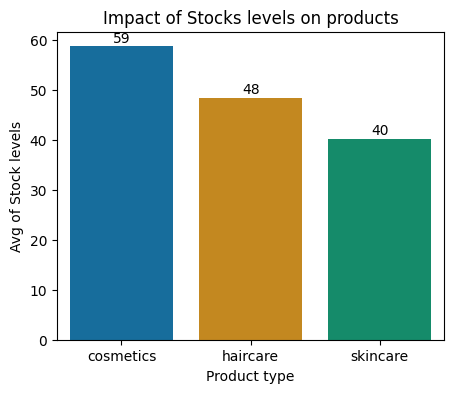

In [50]:
plt.figure(figsize=(5,4))
ax=sns.barplot(data=product_statistics,x='Product type',y='Stock levels',palette='colorblind')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.title('Impact of Stocks levels on products')
plt.xlabel('Product type')
plt.ylabel('Avg of Stock levels')
plt.show()

**Revenue Distribution by Location**

Which locations contribute the most to the overall revenue?

In [61]:
location_revenue=df.groupby('Location')['Revenue generated'].sum().reset_index()
location_revenue

,Location,Revenue generated
0,Bangalore,102601.723882
1,Chennai,119142.815748
2,Delhi,81027.701225
3,Kolkata,137077.551005
4,Mumbai,137755.026877


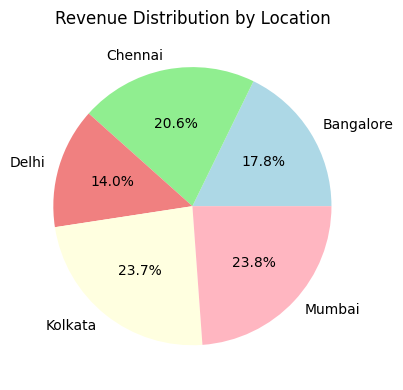

In [25]:
plt.figure(figsize=(5,4))
labels=location_revenue['Location']
sizes=location_revenue['Revenue generated']
colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=[0]*len(labels),colors=colors[:len(sizes)])
plt.title('Revenue Distribution by Location')
plt.tight_layout()
plt.show()

**Comparison of price and manufacturing costs by product type**

In [52]:
producttype_stat=df.groupby('Product type')[['Manufacturing costs','Price']].mean().reset_index()

In [53]:
print(producttype_stat)

  Product type  Manufacturing costs      Price
0    cosmetics            43.052740  57.361058
1     haircare            48.457993  46.014279
2     skincare            48.993157  47.259329


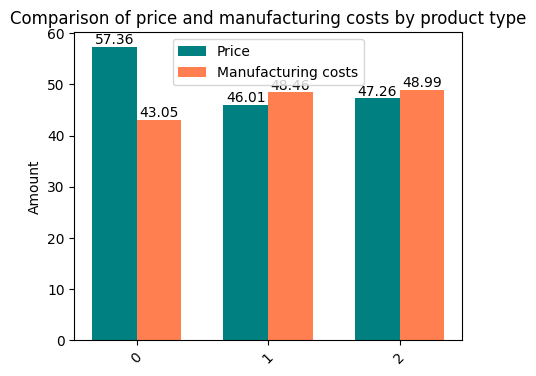

In [54]:

plt.figure(figsize=(5,4))
index=np.arange(len(producttype_stat))
bar_width=0.34
bars1=plt.bar(index,producttype_stat['Price'],bar_width,label='Price',color='Teal')
bars2=plt.bar(index+bar_width,producttype_stat['Manufacturing costs'],bar_width,label='Manufacturing costs',color='Coral')
plt.xticks(index +bar_width/2,producttype_stat.index, rotation=45)
plt.bar_label(bars1,fmt='%.2f')
plt.bar_label(bars2,fmt='%.2f')
plt.ylabel('Amount')
plt.title('Comparison of price and manufacturing costs by product type')
plt.legend()

plt.show()

**Lead Time by Supplier**

How do lead times vary across different suppliers?



In [57]:
leadtime=df.groupby('Supplier name')['Lead times'].mean().reset_index()

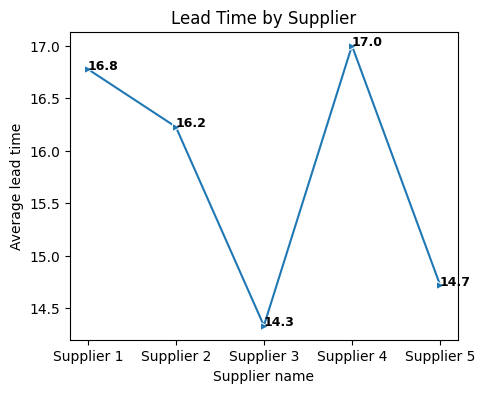

In [59]:
plt.figure(figsize=(5,4))
ax=sns.lineplot(data=leadtime,x='Supplier name',y='Lead times',marker='>')
for i , value in enumerate(leadtime['Lead times']):
    ax.text(leadtime['Supplier name'][i],value,f'{value:.1f}',color='black',weight='bold',fontsize=9)

plt.xlabel('Supplier name')
plt.ylabel('Average lead time')
plt.title('Lead Time by Supplier')
plt.show()
    

**Revenue Contribution by Supplier**

In [63]:
supplier_revenue=df.groupby('Supplier name')['Revenue generated'].sum().reset_index()
supplier_revenue

,Supplier name,Revenue generated
0,Supplier 1,157528.995039
1,Supplier 2,125467.418605
2,Supplier 3,97795.979638
3,Supplier 4,86468.961799
4,Supplier 5,110343.463656


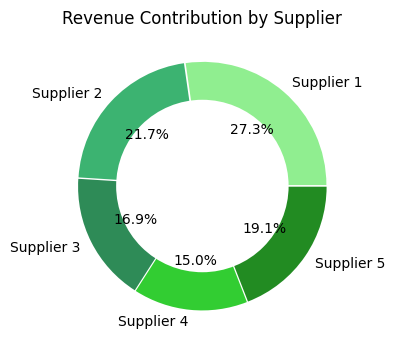

In [28]:
plt.figure(figsize=(5,4))
labels=supplier_revenue['Supplier name']
sizes=supplier_revenue['Revenue generated']
colors=['lightgreen', 'mediumseagreen', 'seagreen', 'limegreen', 'forestgreen', 'darkgreen']
plt.pie(sizes,labels=labels,autopct='%.1f%%',explode=[0.01]*len(labels),wedgeprops=dict(width=0.4),colors=colors[:len(sizes)])
center_circle=plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(center_circle)
plt.title('Revenue Contribution by Supplier')
plt.show()

**Units Sold by Product Type**

Which product types are selling the most units?

In [62]:
unit_sold_stat=df.groupby('Product type')['Number of products sold'].sum().reset_index()
unit_sold_stat

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


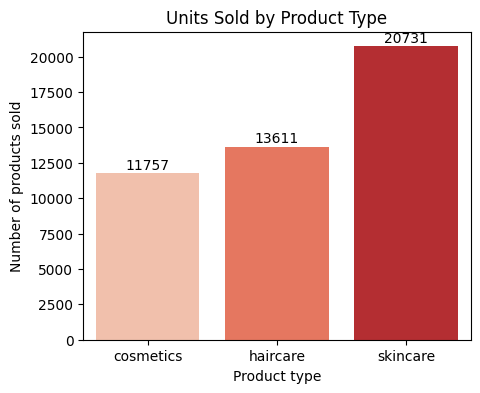

In [32]:
plt.figure(figsize=(5,4))
ax=sns.barplot(data=unit_sold_stat,x='Product type',y='Number of products sold',palette='Reds')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.title('Units Sold by Product Type')
plt.xlabel('Product type')
plt.ylabel('Number of products sold')
plt.show()

**Average Shipping Cost by Transportation Mode**

 How does the cost differ across various transportation modes?

In [41]:
transportation_stats=df.groupby('Transportation modes')['Shipping costs'].mean().reset_index()

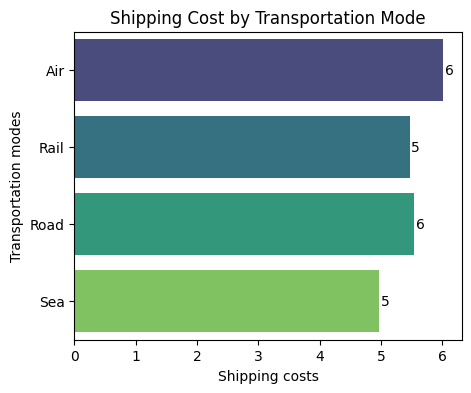

In [56]:
plt.figure(figsize=(5,4))
ax=sns.barplot(data=transportation_stats,y='Transportation modes',x='Shipping costs',palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.xlabel('Shipping costs')
plt.ylabel('Transportation modes')
plt.title('Shipping Cost by Transportation Mode')
plt.show()

**Defect Rates by Inspection Results**

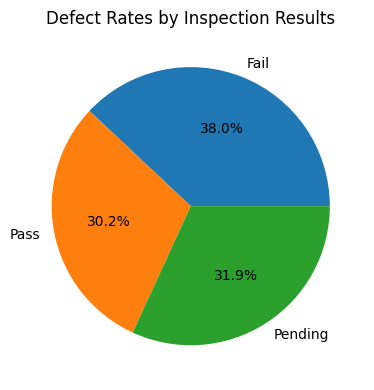

In [55]:
inspection_results_stats=df.groupby('Inspection results')['Defect rates'].mean().reset_index()
plt.figure(figsize=(5,4))
labels=inspection_results_stats['Inspection results']
sizes=inspection_results_stats['Defect rates']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=[0]*len(labels))
plt.title('Defect Rates by Inspection Results')
plt.tight_layout()
plt.show()

**Percentage of Production Volumes Aligned with Market Demands by Location**

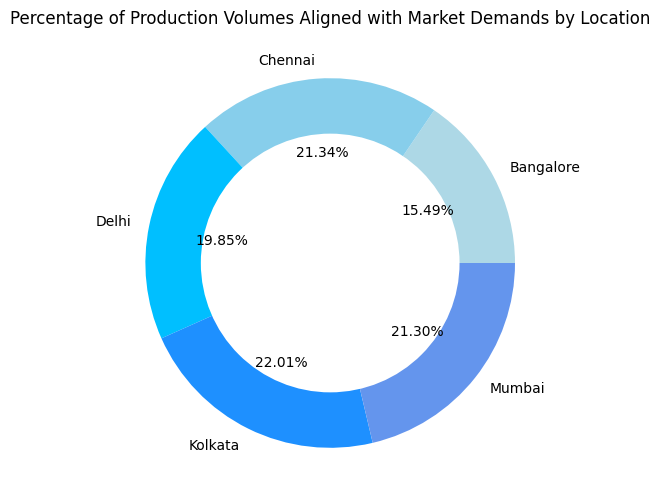

In [44]:
location_stats=df.groupby('Location')['Production volumes'].mean().reset_index()
plt.figure(figsize=(10,6))
labels=location_stats['Location']
sizes=location_stats['Production volumes']
colors = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'steelblue']
plt.pie(sizes,labels=labels,autopct='%.2f%%',explode=[0]*len(labels),wedgeprops=dict(width=0.7),colors=colors[:len(sizes)])
center_circle=plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(center_circle)
plt.title('Percentage of Production Volumes Aligned with Market Demands by Location')
plt.show()

**Total Order Quantity by Transportation Mode**

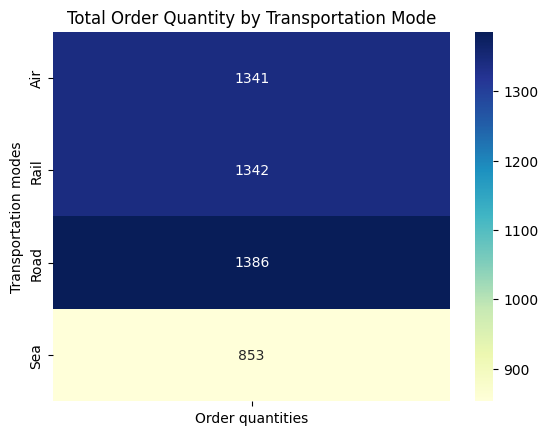

In [70]:
transportation_stats=df.groupby('Transportation modes')['Order quantities'].sum().reset_index()
sns.heatmap(transportation_stats['Order quantities'].values.reshape(-1,1),annot=True,fmt='.0f',cmap='YlGnBu',
            yticklabels=transportation_stats['Transportation modes'],xticklabels=['Order quantities'])

plt.xlabel('')
plt.ylabel('Transportation modes')
plt.title('Total Order Quantity by Transportation Mode')
plt.show()

**Revenue Generated by Price Range**

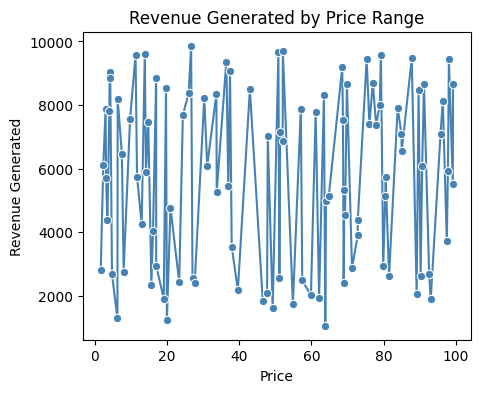

In [33]:
plt.figure(figsize=(5,4))
sns.lineplot(data=df,x='Price',y='Revenue generated',marker='o',color='steelblue')
plt.title('Revenue Generated by Price Range')
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.show()

**Order Quantities by Location**

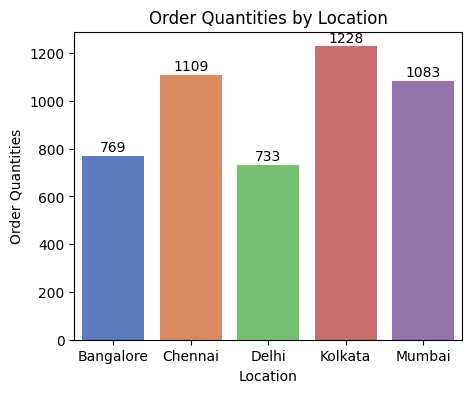

In [39]:
locationstats=df.groupby('Location')['Order quantities'].sum().reset_index()
plt.figure(figsize=(5,4))
ax=sns.barplot(data=locationstats,x='Location',y='Order quantities',palette='muted')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.xlabel('Location')
plt.ylabel('Order Quantities')
plt.title('Order Quantities by Location')
plt.show()

**Overall Profitability by Product Type**

In [66]:
df['Profit']=df['Revenue generated']-df['Manufacturing costs']

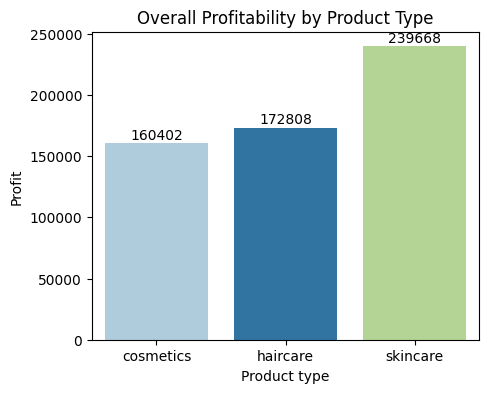

In [38]:
profitby_prod=df.groupby('Product type')['Profit'].sum().reset_index()
plt.figure(figsize=(5,4))
ax=sns.barplot(data=profitby_prod,x='Product type',y='Profit',palette='Paired')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=1)
plt.xlabel('Product type')
plt.ylabel('Profit')
plt.title('Overall Profitability by Product Type')
plt.show()

# FEATURE ENGINEERING

In [50]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
Profit                     0
dtype: int64

I engineered new features to better capture sales efficiency, profitability, supplier quality, shipping costs, and demand-supply alignment. These features made the model smarter and more accurate.

In [10]:
df['Sales_per_stock_unit']=df['Revenue generated']/df['Stock levels']
df['Profit_per_product']=df['Revenue generated']-df['Manufacturing costs']
df['Defect_percentage']=df['Defect rates']*100
df['Shipping_cost_per_product']=df['Shipping costs']/df['Number of products sold']
df['Order_to_production_ratio']=df['Order quantities']/df['Production volumes']
df['Total_lead_time']=df['Lead time']+df['Manufacturing lead time']

In [11]:
categorical_columns=['Product type','Availability','Shipping carriers','Inspection results','Transportation modes', 'Routes','Customer demographics','Supplier name', 'Location']

In [12]:
df_encoded=pd.get_dummies(df,columns=categorical_columns)

In [13]:
drop_col=['SKU']

In [14]:
df_model=df_encoded.drop(columns=drop_col)

In [15]:
df_encoded.columns

Index(['SKU', 'Price', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping costs', 'Lead time',
       ...
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5', 'Location_Bangalore', 'Location_Chennai',
       'Location_Delhi', 'Location_Kolkata', 'Location_Mumbai'],
      dtype='object', length=114)

# DATA MODELING

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X=df_model.drop(columns=['Revenue generated'])
y=df_model['Revenue generated']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [19]:
model=LinearRegression()

In [20]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [21]:
print(y_pred)

[2411.75488059 8232.33371659 7014.89003849 5267.95679183 7152.28691664
 1912.46621164 2390.80815497 8651.67129222 2330.96533862 8661.99595206
 9364.67280127 2766.34304099 7910.88691539 5149.99790634 9592.63295781
 2686.50311839 5328.3759138  2483.75959106 2873.74283798 9655.13497708]


In [22]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [23]:
print('MSE:',mse)
print('R2:',r2)
print('MAE:',mae)
print('RMSE:',rmse)

MSE: 8.72881878894698e-07
R2: 0.9999999999998914
MAE: 0.000723499397008709
RMSE: 0.0009342814773368345


**Residual Analysis**

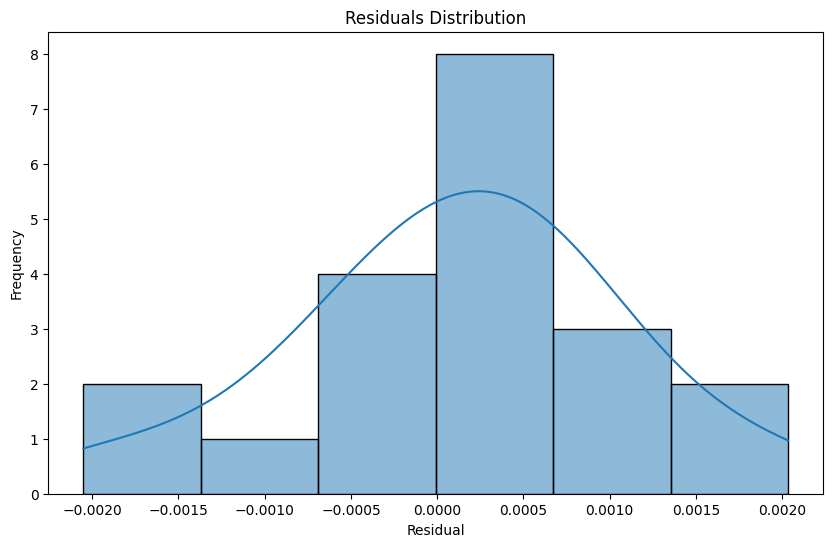

In [24]:
residuals=y_test-y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals,kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title("Residuals Distribution")
plt.show()

**Residual Vs Predicted Plot**

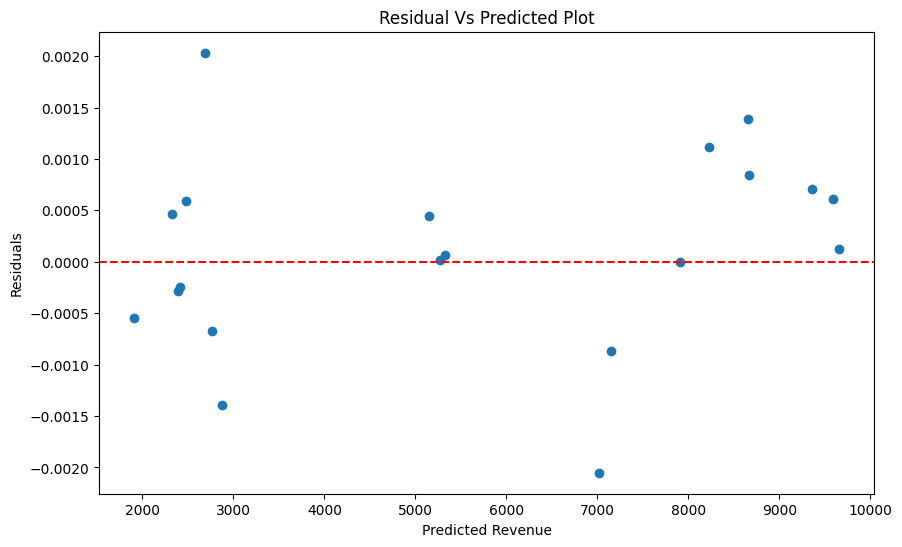

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.title('Residual Vs Predicted Plot')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.show()

**Model Interpretation**

In [26]:
coefficient=model.coef_
features=X.columns

In [27]:
coeff_df=pd.DataFrame({'Features':features,'Coefficient':coefficient})
print(coeff_df.sort_values(by='Coefficient',ascending=False))


               Features  Coefficient
14   Profit_per_product     1.000000
10  Manufacturing costs     0.999987
29      Availability_12     0.000871
66      Availability_74     0.000795
40      Availability_28     0.000728
..                  ...          ...
31      Availability_14    -0.000662
65      Availability_73    -0.000782
68      Availability_78    -0.000864
83      Availability_99    -0.000946
58      Availability_61    -0.001064

[112 rows x 2 columns]


**Predictive Accuracy Check**

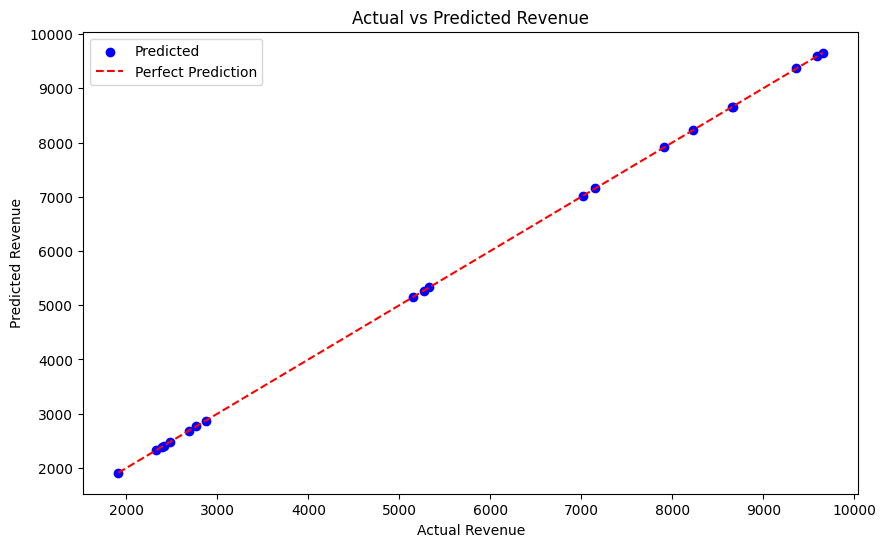

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.show()

In [29]:
df_encoded.columns

Index(['SKU', 'Price', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping costs', 'Lead time',
       ...
       'Supplier name_Supplier 1', 'Supplier name_Supplier 2',
       'Supplier name_Supplier 3', 'Supplier name_Supplier 4',
       'Supplier name_Supplier 5', 'Location_Bangalore', 'Location_Chennai',
       'Location_Delhi', 'Location_Kolkata', 'Location_Mumbai'],
      dtype='object', length=114)

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [31]:
X=df_model.drop(columns=['Revenue generated','Profit_per_product','Number of products sold'])
y=df_model[['Revenue generated','Profit_per_product','Number of products sold']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [32]:
scaler=StandardScaler()

In [33]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
model=keras.Sequential([layers.Dense(128,activation='relu'),
                       layers.Dense(64,activation="relu"),
                        layers.Dense(32,activation='relu'),
                        layers.Dense(3)])

In [35]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [37]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(X_train_scaled,y_train,epochs=50,batch_size=32,validation_split=0.2,callbacks=([early_stop]))


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 19711624.0000 - mae: 3325.6069 - val_loss: 32642092.0000 - val_mae: 4361.2246
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 19553220.0000 - mae: 3316.7256 - val_loss: 32527554.0000 - val_mae: 4350.5151
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 18685854.0000 - mae: 3273.4958 - val_loss: 32407452.0000 - val_mae: 4339.5645
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 19036704.0000 - mae: 3283.2371 - val_loss: 32281384.0000 - val_mae: 4328.2920
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 19138198.0000 - mae: 3280.6008 - val_loss: 32149664.0000 - val_mae: 4316.7129
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 17166736.0000 - mae: 3112.7371 - val_loss: 32011750.0000 - val_mae: 4305.5713
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 17399178.0000 - mae: 3120.6968 - val_loss: 31867300.0000 - val_mae: 4294.0835
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/ste

Visualize Loss Curve

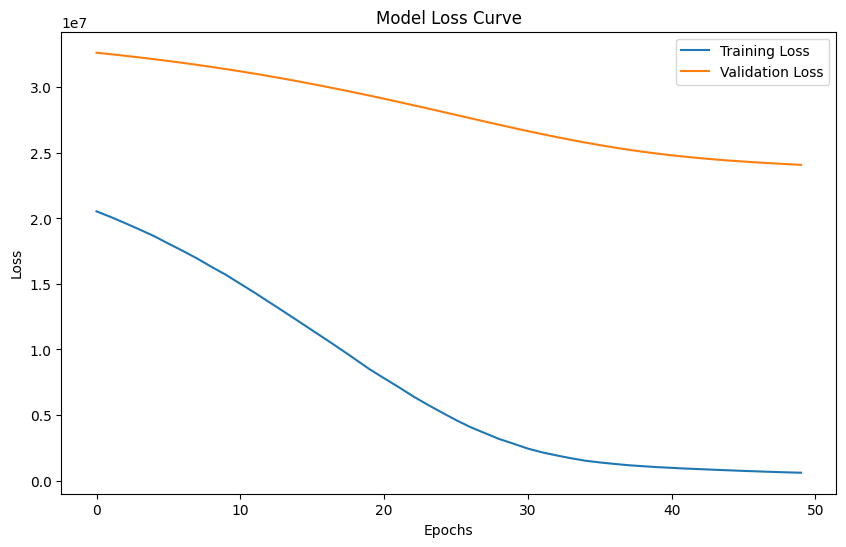

In [38]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Curve')
plt.legend()
plt.show()

Evaluate Test Data

In [39]:
test_loss,test_mae=model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 6173282.0000 - mae: 1749.5797


In [40]:
print(f"Test MAE:{test_mae}")

Test MAE:1749.5797119140625


Evaluate Predictions

In [44]:
y_predict=model.predict(X_test_scaled)
y_predict_df=pd.DataFrame(y_predict,columns=['Predicted_Revenue','Predicted_Profit','Predicted_No._of_Unit_Sold'])
y_test_df=y_test.reset_index(drop=True)
result_df=pd.concat([y_test_df,y_predict_df],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [45]:
result_df.head()

,Revenue generated,Profit_per_product,Number of products sold,Predicted_Revenue,Predicted_Profit,Predicted_No._of_Unit_Sold
0,2411.754632,2314.024038,663,2295.496094,2219.684570,135.096359
1,8232.334829,8148.990770,242,4482.887207,4340.418945,267.347168
2,7014.887987,7003.447205,32,3659.078613,3541.148926,218.369431
3,5267.956808,5201.644263,24,812.406982,787.342224,49.714947
4,7152.286049,7129.731943,919,6024.858887,5835.375977,361.927063
